# Google Ad Costs

Ссылка на датасет: https://www.kaggle.com/datasets/brendan45774/how-much-it-cost-to-get-an-ad-on-google?resource=download

Описание: Google is ranked in the top 10 with over 73,407 backlinks and a domain score of 94. Google search volume has 83,100,100 a month. So how much money does it take to have an ad of your website?

# Об этом датасете
- Keywords - слова, которые люди вводят в Google;
- Search Volume - количество поисковых запросов по данному ключевому слову в месяц;
- CPC(Cost Per Click)- средняя цена за клик за показ рекламы в Google;
- Paid Difficulty - предполагаемая конкуренция в платном поиске, чем выше число, тем выше конкуренция;
- Search Difficulty(SEO Difficulty) - расчетная конкуренция в органическом поиске, чем выше число, тем выше конкуренция.

In [2]:
# Импортируем все необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import markdown 
import scipy.stats
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4f}'.format

In [36]:
# Импортируем датасет

ads=pd.read_csv('Desktop/google_ads_costs.csv')
print(ads.shape)
ads.head()

(100, 6)


,No,Keyword,Search Volume,CPC,Paid Difficulty,Search Difficulty
0,1,google,83100000,$1.19,1,61
1,2,google translate,37200000,$0.82,1,48
2,3,google classroom,24900000,$0.09,4,49
3,4,google maps,24900000,$0.59,1,48
4,5,google docs,20400000,$0.59,1,48


In [37]:
# проведем первичный анализ данных о датасете (df.info() и посмотрим базовые метрики (df.describe())

ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   No                 100 non-null    int64 
 1   Keyword            100 non-null    object
 2   Search Volume      100 non-null    int64 
 3   CPC                100 non-null    object
 4   Paid Difficulty    100 non-null    int64 
 5   Search Difficulty  100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [38]:
ads.describe()

,No,Search Volume,Paid Difficulty,Search Difficulty
count,100.0000,100.0000,100.0000,100.0000
mean,50.5000,2705090.0000,17.4100,51.1500
std,29.0115,9822365.4050,28.2364,8.7518
min,1.0000,74000.0000,1.0000,35.0000
25%,25.7500,135000.0000,1.0000,48.0000
50%,50.5000,301000.0000,4.0000,48.0000
75%,75.2500,867250.0000,15.2500,52.0000
max,100.0000,83100000.0000,100.0000,78.0000


In [39]:
#проверим пропущенные значения 

ads.isnull().sum()

No                   0
Keyword              0
Search Volume        0
CPC                  0
Paid Difficulty      0
Search Difficulty    0
dtype: int64

пропущенные значения в датасете отсутствуют

In [40]:
# отсортируем данные по признаку "CPC" (т.е. по стоимости за клик)

ads.sort_values(by='CPC', ascending=False)

,No,Keyword,Search Volume,CPC,Paid Difficulty,Search Difficulty
94,95,google remote desktop,74000,$6.77,8,38
77,78,google cloud,135000,$6.50,25,55
31,32,google ads,550000,$3.93,32,57
29,30,google adwords,550000,$3.93,32,57
80,81,google business,135000,$3.90,26,55
...,...,...,...,...,...,...
55,56,google chrome download,246000,$0.15,14,47
36,37,google store,450000,$0.15,70,69
18,19,for google chrome,1500000,$0.12,15,47
2,3,google classroom,24900000,$0.09,4,49


как мы видим, наибольшая стоимость за клик наблюдается у запросов "google remote desktop", "google cloud" - более 6 долларов, далее  идут запросы по стоимости за клик ниже 4 долларов - "google ads", "google adwords", "google business"

In [41]:
# выведем уникальные значения стоимости за клик (CPC)

ads['CPC'].unique()

array(['$1.19', '$0.82', '$0.09', '$0.59', '$0.64', '$0.78', '$0.94',
       '$3.89', '$0.69', '$0.66', '$0.57', '$3.34', '$0.47', '$0.71',
       '$0.20', '$1.80', '$0.12', '$0.26', '$2.71', '$0.53', '$2.49',
       '$0.95', '$1.38', '$0.63', '$2.26', '$0.36', '$3.93', '$1.46',
       '$2.46', '$0.52', '$1.17', '$0.68', '$0.15', '$0.28', '$1.79',
       '$0.75', '$2.00', '$2.65', '$1.44', '$2.94', '$0.85', '$1.99',
       '$1.05', '$0.88', '$1.76', '$0.61', '$1.07', '$0.56', '$0',
       '$1.88', '$1.81', '$1.08', '$0.70', '$2.29', '$2.14', '$2.03',
       '$2.10', '$0.35', '$1.36', '$6.50', '$0.48', '$1.14', '$3.90',
       '$0.29', '$0.80', '$2.24', '$1.59', '$1.26', '$1.94', '$1.45',
       '$1.93', '$0.19', '$6.77', '$0.34', '$1.18', '$0.60', '$1.87',
       '$0.54'], dtype=object)

In [42]:
# отсортируем данные по признаку "Paid Difficulty" (т.е. предполагаемой конкуренции в платном поиске)

ads.sort_values(by='Paid Difficulty', ascending=False)

,No,Keyword,Search Volume,CPC,Paid Difficulty,Search Difficulty
65,66,google wifi,165000,$0.75,100,78
61,62,google pixel,201000,$1.81,100,78
75,76,google nest,135000,$1.36,100,78
35,36,google home,450000,$0.68,99,77
86,87,google home hub,90500,$1.59,94,69
...,...,...,...,...,...,...
1,2,google translate,37200000,$0.82,1,48
53,54,google keep,246000,$0.66,1,48
57,58,google contacts,246000,$0.56,1,48
58,59,google fonts,201000,$0,1,48


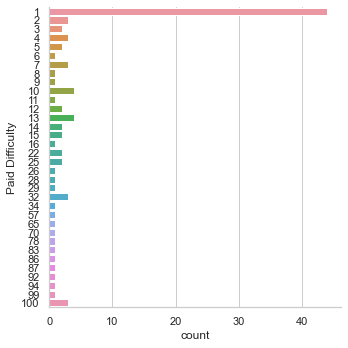

In [43]:
# построим категориальный график по параметру Paid Difficulty, используя визуализацию библиотеки plot

sns.catplot(y = 'Paid Difficulty', data = ads, kind = 'count')

по графику видно, что по предполагаемой конкуренции в платном поиске 40 запросов из 100 не являются высоко конкурентными (показатель = 1),  чем выше число, тем выше конкуренция;

In [53]:
# определим топ-10 самых популярных (наибольших по числу) поисковых запросов

short_ads = ads[['Keyword', 'Search Volume', 'CPC']]
short_ads[short_ads.groupby('Search Volume')['CPC'].transform(max) == short_ads['CPC']]
short_ads.head(10)

,Keyword,Search Volume,CPC
0,google,83100000,$1.19
1,google translate,37200000,$0.82
2,google classroom,24900000,$0.09
3,google maps,24900000,$0.59
4,google docs,20400000,$0.59
5,google drive,11100000,$0.64
6,google flights,9140000,$0.78
7,google news,6120000,$0.94
8,google scholar,4090000,$3.89
9,google slides,4090000,$0.69


самые популярные запросы по числу поиска в месяц - "google", "google translate", "google maps", "google docs", "google drive"

In [82]:
# найдем наибольший показатель Paid Difficulty (показатель конкуренции в платном поиске)

paidtop_ads=ads.groupby('Keyword')['Paid Difficulty'].mean()
paidtop_ads

Keyword
for google account     2.0000
for google chrome     15.0000
google                 1.0000
google account         2.0000
google ads            32.0000
                       ...   
google trends          1.0000
google underwater      1.0000
google voice           1.0000
google weather         3.0000
google wifi          100.0000
Name: Paid Difficulty, Length: 100, dtype: float64

In [86]:
paidtop_ads.sort_values(ascending=False)

Keyword
google wifi       100.0000
google nest       100.0000
google pixel      100.0000
google home        99.0000
google home hub    94.0000
                    ...   
google logo         1.0000
google mail         1.0000
google maps         1.0000
google news         1.0000
google login        1.0000
Name: Paid Difficulty, Length: 100, dtype: float64

вывод - топ-5 запросов с наибольшим показателем Paid Difficulty, т.е. запросы, по которым существует наибольшая конкуренция в платном поиске - "google wifi", "google nest", "google pixel", "google home", "google home hub"

In [91]:
paidtop10=paidtop_ads.sort_values(ascending=False).head(10)
paidtop10

Keyword
google wifi        100.0000
google nest        100.0000
google pixel       100.0000
google home         99.0000
google home hub     94.0000
google nest hub     92.0000
google glass        87.0000
google home mini    86.0000
google nest mini    83.0000
google pixel 4      78.0000
Name: Paid Difficulty, dtype: float64

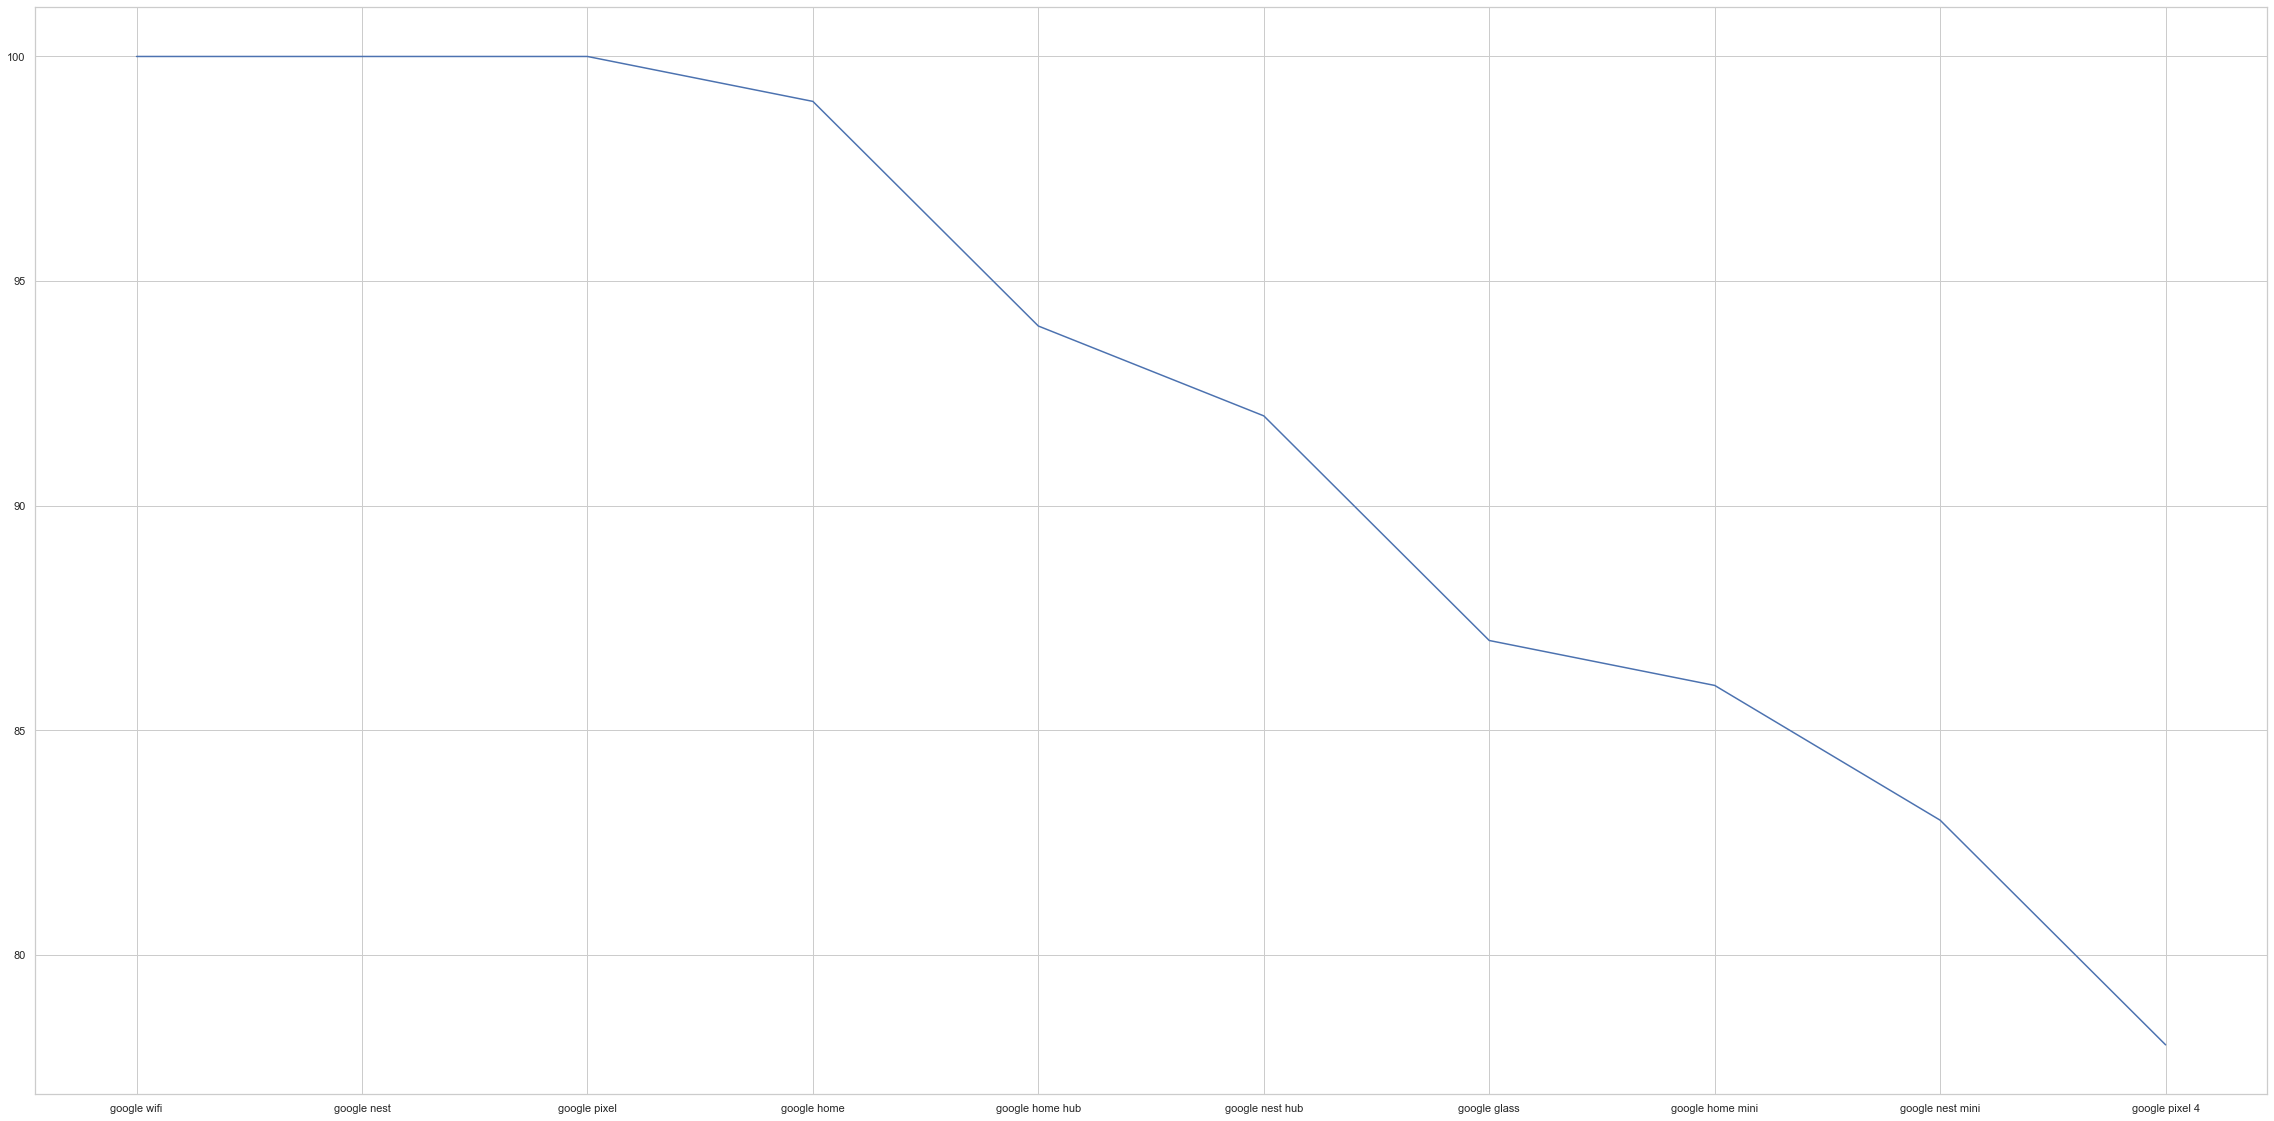

In [92]:
fig, ax = plt.subplots(figsize=(40,20))
ax.plot(paidtop10)

найдем размах, дисперсию и сраднеквадратичное отклонение количества стоимости клика

In [99]:
scope_dur = ads['Search Volume'].max() - ads['Search Volume'].min()
var_dur = ads['Search Volume'].var()
std_dur = ads['Search Volume'].std()
print(scope_dur)
print(var_dur)
print(std_dur)

83026000
96478862148383.84
9822365.404951286


#  Матрица корреляций

проведем анализ, используя матрицу корреляций. на пересечении в сетке матрицы выводится коэффициент корреляции между двумя полями. А именно, число на пересечении сетки говорит о том, насколько сильно зависит один фактор от другого (0 - нет зависимости, 1 - полное соответствин двух полей).

In [100]:
#для построения более корректной матрицы корреляций удаляем столбец порядкого номера 'serial'
ads_without_serial = ads.drop(columns=['No']) 
ads_without_serial

,Keyword,Search Volume,CPC,Paid Difficulty,Search Difficulty
0,google,83100000,$1.19,1,61
1,google translate,37200000,$0.82,1,48
2,google classroom,24900000,$0.09,4,49
3,google maps,24900000,$0.59,1,48
4,google docs,20400000,$0.59,1,48
...,...,...,...,...,...
95,google extensions,74000,$0.34,1,41
96,google timer,74000,$1.18,1,41
97,google express,74000,$0.60,9,43
98,google dictionary,74000,$1.87,1,41


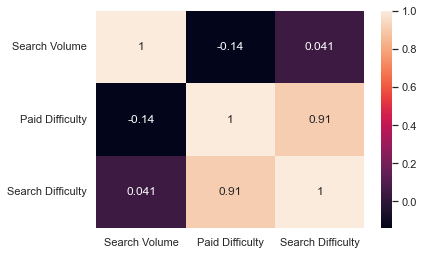

In [101]:
import seaborn as sn
import matplotlib.pyplot as plt

correlation_matrix = ads_without_serial.corr()
# формируем матрицу корреляций

sn.heatmap(correlation_matrix, annot=True)
plt.show()
# выводим матрицу корреляций в виде heatmap для наглядной визуализации

как видно из тепловой карты, показатели Search Volume и Search Volume коррелируются на высоком уровне

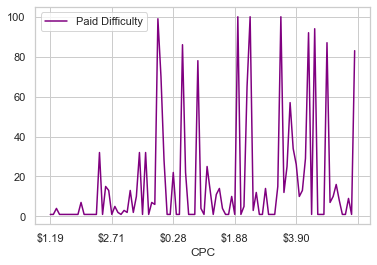

In [104]:
# построим график CPC от Paid Difficulty, т.е. зависимость стоимости за клик от конкуренции в платном поиске
on_target_cpc_plot = ads.plot(
    x='CPC', y='Paid Difficulty', 
    color='purple'
)

как видно из графика, чем выше показатель конкуренции в платном поиске, тем выше стоимость за клик